In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
mean_01 = np.array([3.0,4.0])

#Lemons are sour, avg sweetness will low, they have some low value for color
# Red values is higher, Yellow Lower
# Sweetness is higher, Sourness Lower
mean_01 = np.array([3.0,4.0])

#2 X 2 identity matrix
cov_01 = np.array([[1.0,-0.5],[-0.5,1.0]])

mean_02 = np.array([0.0,0.0])

cov_02 = np.array([[1.0,.5],[0.5,0.6]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,200)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,200)

print (dist_01.shape)
print (dist_02.shape)
# print dist_01

(200, 2)
(200, 2)


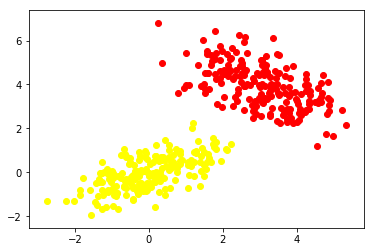

In [4]:
# Try to make a scatter plot of these points
plt.figure(0)

for x in range(dist_01.shape[0]):
    plt.scatter(dist_01[x,0],dist_01[x,1],color='red')
    plt.scatter(dist_02[x,0],dist_02[x,1],color='yellow')
   
 plt.show()

In [5]:
# Training Data Preparation

# 400 Samples - 200 Apples, 200 for Lemons

labels = np.zeros((400,1))
labels[200:] = 1.0

X_data = np.zeros((400,2))
X_data[:200,:] = dist_01
X_data[200: ,:] = dist_02

# print X_data
# print labels

In [7]:
#Dist of the query_point to all other points in the space ( O(N)) time for every point + sorting 
# You can the complexity O(Q.N)

#Euclidean Distance 
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

x1 = np.array([0.0,0.0])
x2 = np.array([1.0,1.0])

print (dist(x1,x2))

1.4142135623730951


In [17]:
def knn(X_train,query_point,y_train,k=5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        v = [ dist(query_point,X_train[ix,:]), y_train[ix]]
        vals.append(v)
    # vals is a list containing distances and their labels
    updated_vals = sorted(vals)
    # Lets us pick up top K values
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr[:,1],return_counts = True)
    #Largest Occurence 
    index = pred_arr[1].argmax() #Index of largest freq  
    return pred_arr[0][index]

q = np.array([0.0,4.0])

predicted_label  = knn(X_data,q,labels)
print (predicted_label)

0.0


In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
ds = pd.read_csv('./train.csv')
print (ds.shape)

data = ds.values
print (data.shape)

(42000, 785)
(42000, 785)


(42000,) (42000, 784)
1


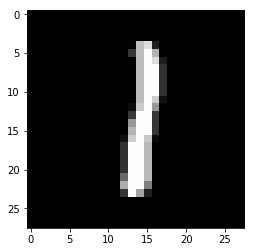

In [38]:
y_train = data[:, 0]
X_train = data[:, 1:]

# X_train = (X_train - X_train.mean(axis=0))/(X_train.std(axis=0) + 1e-03)

print (y_train.shape, X_train.shape)

plt.figure(0)
idx = 41467
print(y_train[idx])
plt.imshow(X_train[idx].reshape((28, 28)), cmap='gray')
plt.show()

In [39]:
def dist(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())


def knn(X_train, x, y_train, k=5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        v = [dist(x, X_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x: x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr[:, 1], return_counts=True)
    pred = pred_arr[1].argmax()
    # return pred_arr[0][pred]
    return pred_arr, pred_arr[0][pred]

((array([1.]), array([7])), 1.0)
1


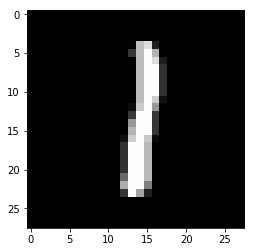

In [42]:
#idq = int(np.random.random() * X_train.shape[0])

q = X_train[idq]

res = knn(X_train[:10000], q, y_train[:10000], k=7)
print (res)
print (y_train[idq])

plt.figure(0)
plt.imshow(q.reshape((28, 28)), cmap='gray')
plt.show()